The thomson.spectral_density function calculates the spectral density function S(k,w), which is one of several terms that determine the scattered power spectrum for the Thomson scattering of a probe laser beam by a plasma.

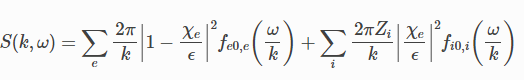

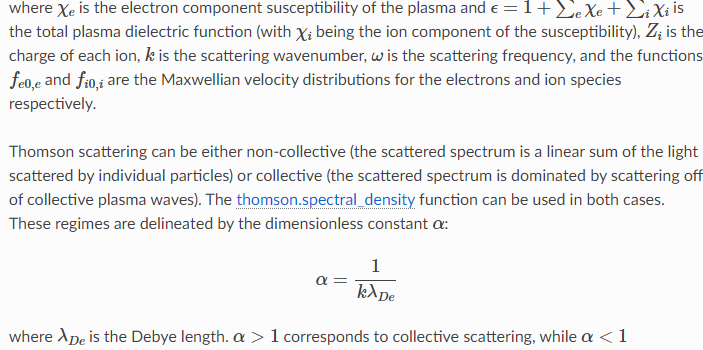

“Plasma Scattering of Electromagnetic Radiation”

In [ ]:
pip install plasmapy


In [7]:
import plasmapy

In [8]:
%matplotlib inline

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np


from plasmapy.diagnostics import thomson


# 1064 nm are used (532 corresponds to a frequency-doubled probe beam from such a laser).
probe_wavelength = 532 * u.nm

### Array of wavelengths over which to calculate the spectral distribution

In [10]:
probe_wavelength = 532 * u.nm

In [11]:
wavelengths = (
    np.arange(probe_wavelength.value - 60, probe_wavelength.value + 60, 0.01) * u.nm
)

# The scattering geometry is defined by unit vectors for the orientation of the probe laser beam (probe_n) and
# the path from the scattering volume (where the measurement is made) to the detector (scatter_n).
# These can be setup for any experimental geometry.

In [12]:
probe_vec = np.array([1, 0, 0])

In [13]:
scattering_angle = np.deg2rad(63)

In [14]:
scatter_vec = np.array([np.cos(scattering_angle), np.sin(scattering_angle), 0])

In order to calculate the scattered spectrum, we must also include some information about the plasma. For this plot we’ll allow the fract, ion_species, fluid_vel, and ion_vel keywords to keep their default values, describing a single-species H+ plasma at rest in the laboratory frame.

In [15]:
ne = 2e17 * u.cm**-3
T_e = 12 * u.eV
T_i = 10 * u.eV

In [16]:
alpha, Skw = thomson.spectral_density(
    wavelengths,
    probe_wavelength,
    ne,
    T_e=T_e,
    T_i=T_i,
    probe_vec=probe_vec,
    scatter_vec=scatter_vec,
)

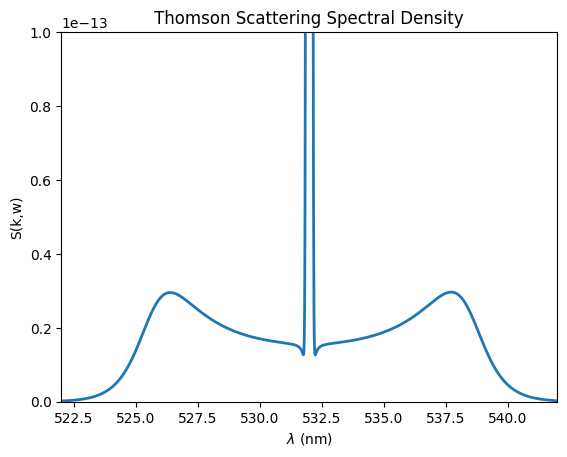

In [17]:
fig, ax = plt.subplots()
ax.plot(wavelengths, Skw, lw=2)
ax.set_xlim(probe_wavelength.value - 10, probe_wavelength.value + 10)
ax.set_ylim(0, 1e-13)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("S(k,w)")
ax.set_title("Thomson Scattering Spectral Density");

Example Cases in Different Scattering Regimes:
A single-species, stationary hydrogen plasma with a density and temperature that results in a scattering spectrum dominated by scattering off of single electrons.

In [18]:
non_collective = {
    "name": "Non-Collective Regime",
    "n": 5e15 * u.cm**-3,
    "T_e": 40 * u.eV,
    "T_i": np.array([10]) * u.eV,
    "ions": ["H+"],
    "electron_vel": np.array([[0, 0, 0]]) * u.km / u.s,
    "ion_vel": np.array([[0, 0, 0]]) * u.km / u.s,
}

A single-species, stationary hydrogen plasma with a density and temperature that result in weakly collective scattering (scattering parameter
 approaching 1)

In [19]:
weakly_collective = {
    "name": "Weakly Collective Regime",
    "n": 2e17 * u.cm**-3,
    "T_e": 20 * u.eV,
    "T_i": 10 * u.eV,
    "ions": ["H+"],
    "electron_vel": np.array([[0, 0, 0]]) * u.km / u.s,
    "ion_vel": np.array([[0, 0, 0]]) * u.km / u.s,
}

A single-species, stationary hydrogen plasma with a density and temperature that result in a spectrum dominated by multi-particle scattering, including scattering off of ions.

In [20]:
collective = {
    "name": "Collective Regime",
    "n": 5e17 * u.cm**-3,
    "T_e": 10 * u.eV,
    "T_i": 4 * u.eV,
    "ions": ["H+"],
    "electron_vel": np.array([[0, 0, 0]]) * u.km / u.s,
    "ion_vel": np.array([[0, 0, 0]]) * u.km / u.s,
}

A case identical to the collective example above, except that now the electron fluid has a substantial drift velocity parallel to the probe laser and the ions have a drift (relative to the electrons) at an angle.

In [21]:
drifts = {
    "name": "Drift Velocities",
    "n": 5e17 * u.cm**-3,
    "T_e": 10 * u.eV,
    "T_i": 10 * u.eV,
    "ions": ["H+"],
    "electron_vel": np.array([[700, 0, 0]]) * u.km / u.s,
    "ion_vel": np.array([[-600, -100, 0]]) * u.km / u.s,
}

A case identical to the collective example, except that now the plasma consists 25% He+1 and 75% C+5, and two electron populations exist with different temperatures.

In [22]:
two_species = {
    "name": "Two Ion and Electron Components",
    "n": 5e17 * u.cm**-3,
    "T_e": np.array([50, 10]) * u.eV,
    "T_i": np.array([10, 50]) * u.eV,
    "efract": np.array([0.5, 0.5]),
    "ifract": np.array([0.25, 0.75]),
    "ions": ["He-4 1+", "C-12 5+"],
    "electron_vel": np.array([[0, 0, 0], [0, 0, 0]]) * u.km / u.s,
    "ion_vel": np.array([[0, 0, 0], [0, 0, 0]]) * u.km / u.s,
}

In [23]:
examples = [non_collective, weakly_collective, collective, drifts, two_species]

For each example, plot the the spectral distribution function over a large range to show the broad electron scattering feature (top row) and a narrow range around the probe wavelength to show the ion scattering feature (bottom row)

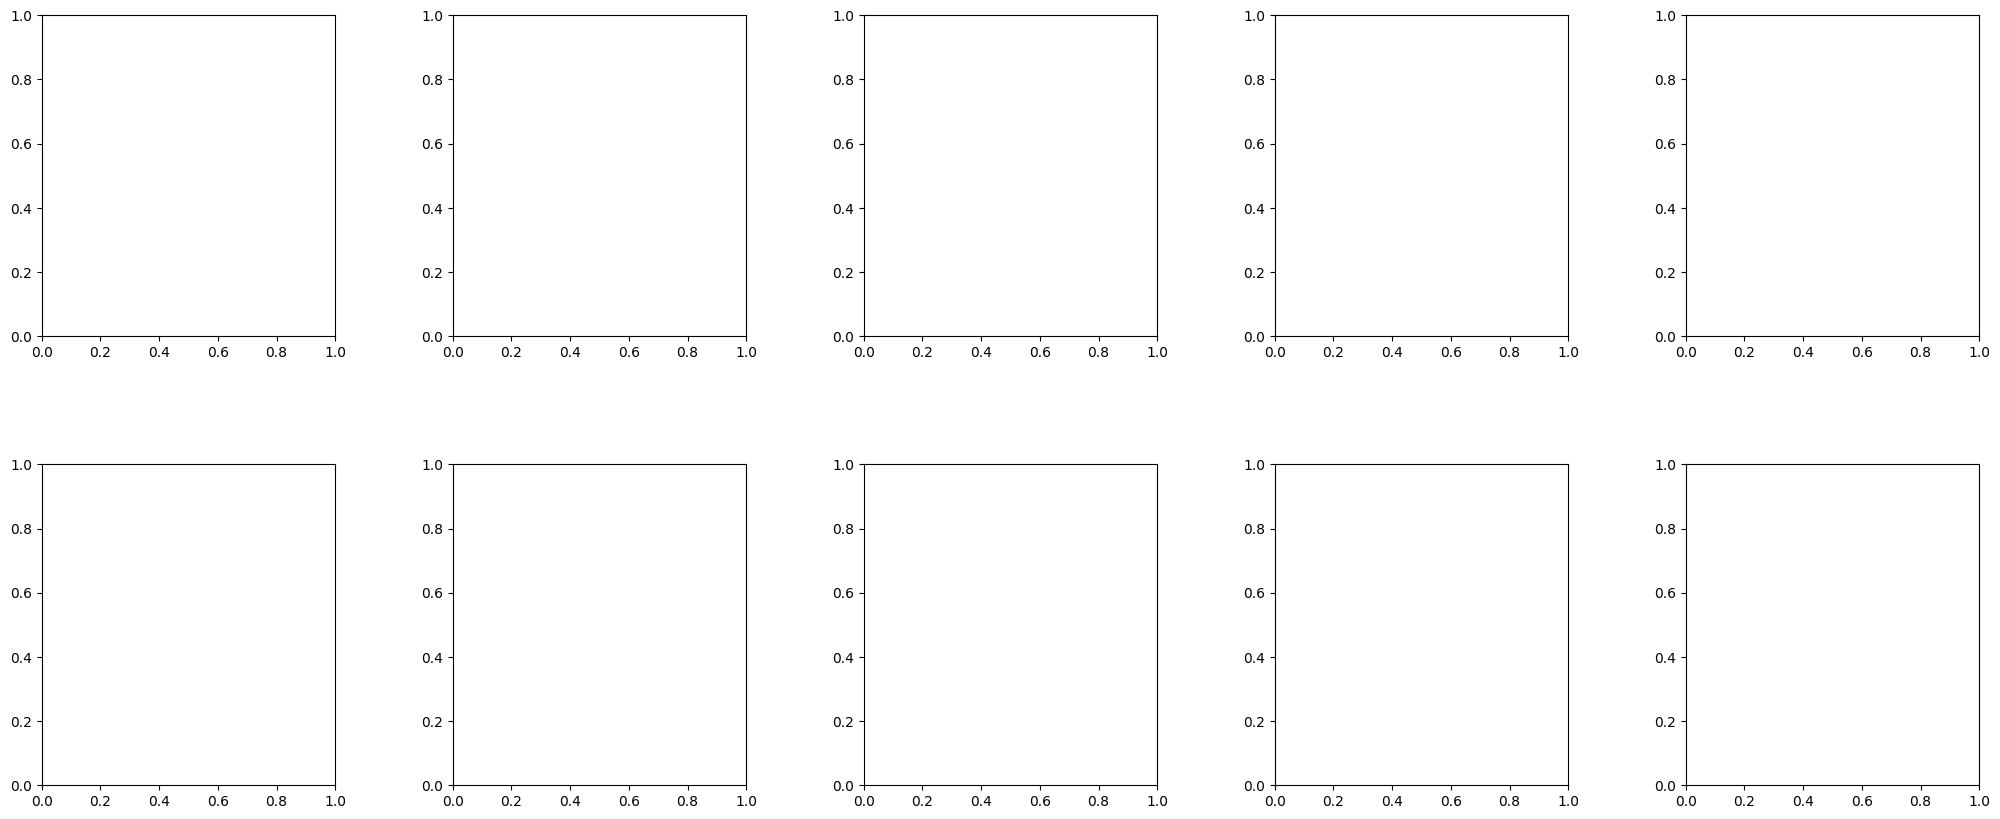

In [24]:
fig, ax = plt.subplots(ncols=len(examples), nrows=2, figsize=[25, 10])
fig.subplots_adjust(wspace=0.4, hspace=0.4)

lbls = "abcdefg"

for i, x in enumerate(examples):
    alpha, Skw = thomson.spectral_density(
        wavelengths,
        probe_wavelength,
        x["n"],
        T_e=x["T_e"],
        T_i=x["T_i"],
        ifract=x.get("ifract"),
        efract=x.get("efract"),
        ions=x["ions"],
        electron_vel=x["electron_vel"],
        ion_vel=x["ion_vel"],
        probe_vec=probe_vec,
        scatter_vec=scatter_vec,
    )


In [25]:
    ax[0][i].axvline(x=probe_wavelength.value, color="red")  # Mark the probe wavelength
    ax[0][i].plot(wavelengths, Skw)
    ax[0][i].set_xlim(probe_wavelength.value - 15, probe_wavelength.value + 15)
    ax[0][i].set_ylim(0, 1e-13)
    ax[0][i].set_xlabel("$\lambda$ (nm)")

    ax[0][i].set_title(lbls[i] + ") " + x["name"] + "\n$\\alpha$={:.4f}".format(alpha))

    ax[1][i].axvline(x=probe_wavelength.value, color="red")  # Mark the probe wavelength
    ax[1][i].plot(wavelengths, Skw)
    ax[1][i].set_xlim(probe_wavelength.value - 1, probe_wavelength.value + 1)
    ax[1][i].set_ylim(0, 1.1 * np.max(Skw.value))
    ax[1][i].set_xlabel("$\lambda$ (nm)")

Text(0.5, 4.4444444444444375, '$\\lambda$ (nm)')

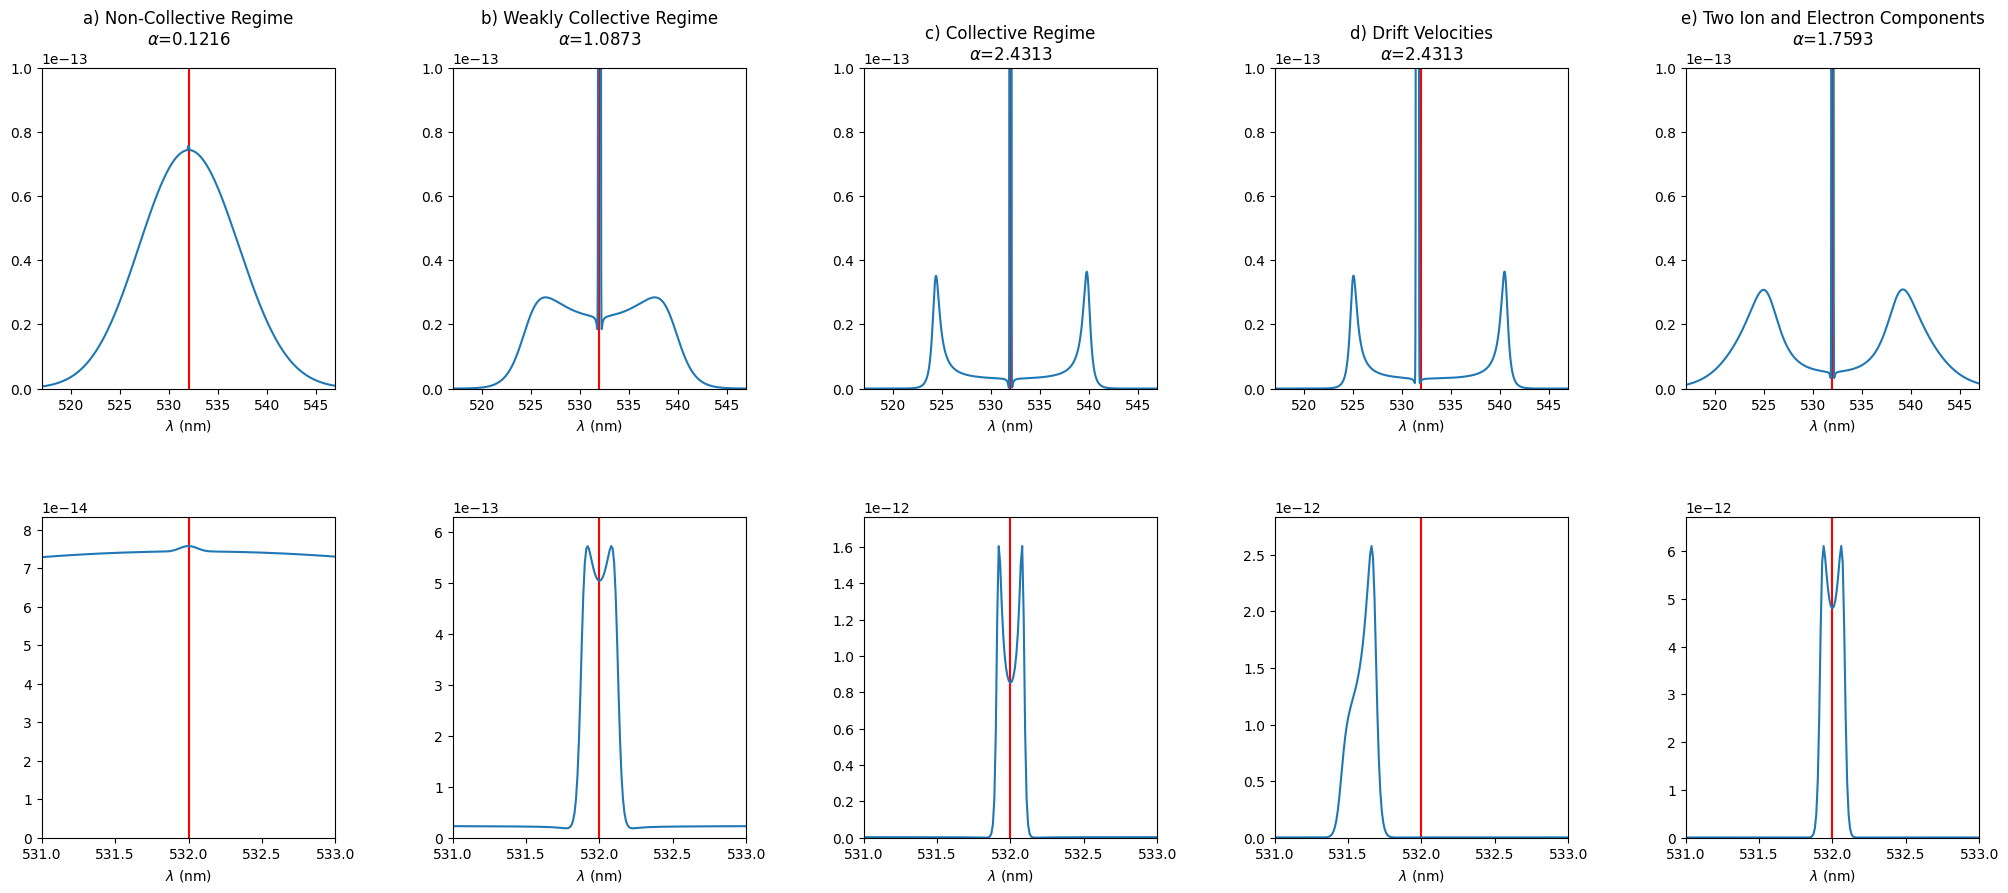

In [26]:
fig, ax = plt.subplots(ncols=len(examples), nrows=2, figsize=[25, 10])
fig.subplots_adjust(wspace=0.4, hspace=0.4)

lbls = "abcdefg"

for i, x in enumerate(examples):
    alpha, Skw = thomson.spectral_density(
        wavelengths,
        probe_wavelength,
        x["n"],
        T_e=x["T_e"],
        T_i=x["T_i"],
        ifract=x.get("ifract"),
        efract=x.get("efract"),
        ions=x["ions"],
        electron_vel=x["electron_vel"],
        ion_vel=x["ion_vel"],
        probe_vec=probe_vec,
        scatter_vec=scatter_vec,
    )

    ax[0][i].axvline(x=probe_wavelength.value, color="red")  # Mark the probe wavelength
    ax[0][i].plot(wavelengths, Skw)
    ax[0][i].set_xlim(probe_wavelength.value - 15, probe_wavelength.value + 15)
    ax[0][i].set_ylim(0, 1e-13)
    ax[0][i].set_xlabel("$\lambda$ (nm)")

    ax[0][i].set_title(lbls[i] + ") " + x["name"] + "\n$\\alpha$={:.4f}".format(alpha))

    ax[1][i].axvline(x=probe_wavelength.value, color="red")  # Mark the probe wavelength
    ax[1][i].plot(wavelengths, Skw)
    ax[1][i].set_xlim(probe_wavelength.value - 1, probe_wavelength.value + 1)
    ax[1][i].set_ylim(0, 1.1 * np.max(Skw.value))
    ax[1][i].set_xlabel("$\lambda$ (nm)")

Findings:

Plots of the spectral density function (Skw) which determines the amount of light scattered into different wavelengths.

In the non-collective regime only the electron feature is visible.

In the weakly collective regime (alpha approaches 1) an ion feature starts to appear and the electron feature is distorted

In the collective regime both features split into two peaks, corresponding to scattering off of forward and backwards propagating plasma oscillations.

The introduction of drift velocities introduces several Doppler shifts in the calculations, resulting in a shifted spectrum.

Including multiple ion and electron populations modifies the ion and electron features respectively